In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

## 7-qubit

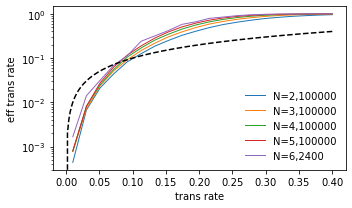

In [46]:
repeat = 100
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,7)

plt.figure(1,figsize=(5,3))

bdy = True
Nl = 2
first = True
for i_rep in range(repeat):
    if bdy:
        fname = "data_7q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
    else:
        fname = "data_7q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
    if os.path.exists(fname):
        npz_file = np.load(fname)
        succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']

        if first :
            first = False
            succ_prob_2 = np.zeros(len(p_list))
            Ntot = 0

        succ_prob_2 += succ_prob*Nrep
        Ntot += Nrep
succ_prob_2 /= Ntot

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_7q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_7q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_avg /= Ntot
        plt.plot(p_list,1-succ_prob_avg**2,"-", color="C%d" % (i_L), linewidth=1,label="N=%d,%d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_2**Nl,"--", color="C%d" % (i_L), linewidth=1)


f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")



x_list = np.linspace(0.6,1,200)
plt.plot(1-x_list,1-x_list,"k--")
plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## Effect of boundary condition

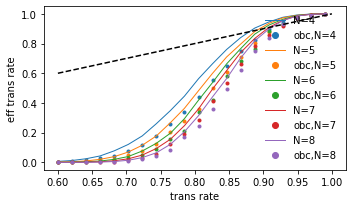

In [42]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(4,9)

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_7q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:
        succ_prob_avg /= Ntot
        plt.plot(1-p_list,succ_prob_avg**2,"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))

    first = True
    for i_rep in range(repeat):
        fname = "data_7q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg_obc = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg_obc += succ_prob*Nrep
            Ntot += Nrep
   
    if not first:
        succ_prob_avg_obc /= Ntot
        plt.plot(1-p_list,succ_prob_avg_obc**2,".", color="C%d" % (i_L), linewidth=1,label="obc,N=%d" % (Nl))

# f = lambda t: t**4 + 4*t**3 * (1-t) # ring 
# f = lambda t: t**6 + 6*t**5 * (1-t)+ 6*t**4 * (1-t)**2 # [2,2] tree 
# plt.plot(1-p_list,f(1-p_list)**4,"k-")

x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## 48-qubit ldpc

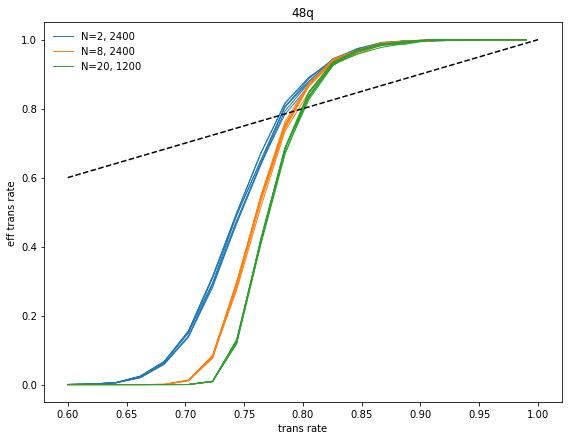

In [2]:
repeat = 24
Nl_list = [2,8,20]#np.arange(2,21,1)

plt.figure(1,figsize=(8,6))

bdy = True
# Nl = 3
# first = True
# for i_rep in range(repeat):
#     if bdy:
#         fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
#     else:
#         fname = "data_48q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)

#     if os.path.exists(fname):
#         npz_file = np.load(fname)
#         succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

#         if first :
#             first = False
#             succ_prob_X_2 = np.zeros(len(p_list))
#             succ_prob_Z_2 = np.zeros(len(p_list))
#             Ntot = 0

#         succ_prob_X_2 += succ_prob_X*Nrep
#         succ_prob_Z_2 += succ_prob_Z*Nrep
#         Ntot += Nrep
            
# succ_prob_X_2 /= Ntot
# succ_prob_Z_2 /= Ntot

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (i_L))#,label="N=%d, %d" % (Nl,Ntot))        
        # plt.fill_between(1-p_list,succ_prob_avg-xzerr,succ_prob_avg+xzerr)
        # plt.plot(1-p_list,succ_prob_X_avg,"-", color="C%d" % (2*i_L), linewidth=1,label="X")
        # plt.plot(1-p_list,succ_prob_Z_avg,"-", color="C%d" % (2*i_L+1), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))




# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")

x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")
# plt.yscale("log")

# plt.ylim(6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(7e-1,1)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("48q")
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

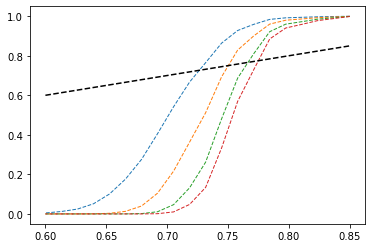

In [129]:
plt.plot(1-p_list,succ_prob_X_2**(2),"--", linewidth=1,label="X, N=%d" % (Nl))
plt.plot(1-p_list,succ_prob_X_2**(5),"--", linewidth=1,label="X, N=%d" % (Nl))
plt.plot(1-p_list,succ_prob_X_2**(10),"--", linewidth=1,label="X, N=%d" % (Nl))
plt.plot(1-p_list,succ_prob_X_2**(15),"--", linewidth=1,label="X, N=%d" % (Nl))
plt.plot(x_list,x_list,"k--")


## Effect of boundary condition

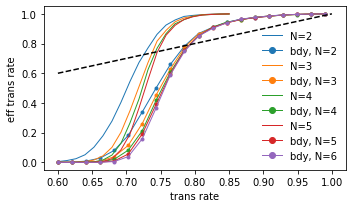

In [28]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,9)

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros(len(p_list))
                succ_prob_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            Ntot += Nrep
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg*succ_prob_Z_avg,"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))

    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg_obc = np.zeros(len(p_list))
                succ_prob_Z_avg_obc = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg_obc += succ_prob_X*Nrep
            succ_prob_Z_avg_obc += succ_prob_Z*Nrep
            Ntot += Nrep
            # plt.plot(1-p_list,succ_prob_X,".", color="C%d" % (i_L))

    if not first:
        succ_prob_X_avg_obc /= Ntot
        succ_prob_Z_avg_obc /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg_obc*succ_prob_Z_avg_obc,".-", color="C%d" % (i_L), linewidth=1,label="bdy, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg_obc,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))

x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## new logical operator comparison

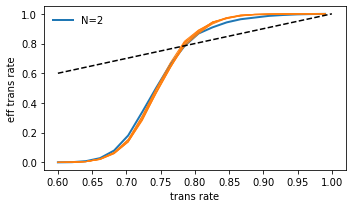

In [119]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = [2]
bdy = True

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros(len(p_list))
                succ_prob_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            Ntot += Nrep
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg*succ_prob_Z_avg,"-", color="C%d" % (2*i_L), linewidth=2,label="N=%d" % (Nl))

    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L+1), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (i_L),label="new,N=%d, %d" % (Nl,Ntot))        
        
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

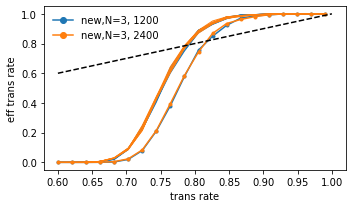

In [133]:
### efficient code

repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = [3]
bdy = True

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(24,24+repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (2*i_L),label="new,N=%d, %d" % (Nl,Ntot))        
        
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L+1), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (2*i_L+1),label="new,N=%d, %d" % (Nl,Ntot))        
        
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## 46-qubit code

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


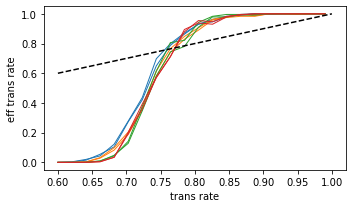

In [52]:
repeat = 24
Nl_list = np.arange(2,6,1)

plt.figure(1,figsize=(5,3))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_46q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_46q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),2))
                succ_prob_Z_avg = np.zeros((len(p_list),2))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg

        # xzerr = ((xerr/succ_prob_X_avg)**2+(zerr/succ_prob_Z_avg)**2)**0.5* succ_prob_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (i_L),label="N=%d, %d" % (Nl,Ntot))        
        # plt.fill_between(1-p_list,succ_prob_avg-xzerr,succ_prob_avg+xzerr)
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))
        # plt.plot(1-p_list,(succ_prob_X_2*succ_prob_Z_2),"k--")#, color="C%d" % (i_L), linewidth=1,label="X, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))


# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")
# plt.yscale("log")
# plt.ylim(6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(7e-1,1)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## 126-qubit

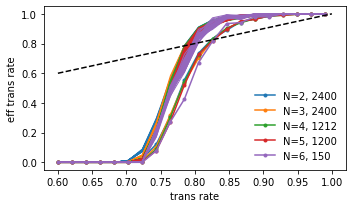

In [144]:
repeat = 24
Nl_list = np.arange(2,7,1)

plt.figure(1,figsize=(5,3))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_126q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_126q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),28))
                succ_prob_Z_avg = np.zeros((len(p_list),28))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg

        # xzerr = ((xerr/succ_prob_X_avg)**2+(zerr/succ_prob_Z_avg)**2)**0.5* succ_prob_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (i_L),label="N=%d, %d" % (Nl,Ntot))        
        # plt.fill_between(1-p_list,succ_prob_avg-xzerr,succ_prob_avg+xzerr)
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))
        # plt.plot(1-p_list,(succ_prob_X_2*succ_prob_Z_2),"k--")#, color="C%d" % (i_L), linewidth=1,label="X, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))


# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")
# plt.yscale("log")
# plt.ylim(6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(7e-1,1)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## ldpc comparison

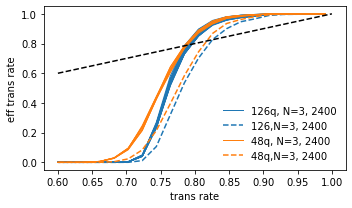

In [110]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = [3]
bdy = True

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_126q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_126q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),28))
                succ_prob_Z_avg = np.zeros((len(p_list),28))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg

        # xzerr = ((xerr/succ_prob_X_avg)**2+(zerr/succ_prob_Z_avg)**2)**0.5* succ_prob_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L), linewidth=1)#, label="126,N=%d, %d" % (Nl,Ntot))  
        # plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (i_L),label="N=%d, %d" % (Nl,Ntot))        
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (2*i_L), linewidth=1,label="126q, N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (2*i_L),label="126,N=%d, %d" % (Nl,Ntot))        


    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (2*i_L+1), linewidth=1,label="48q, N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L+1), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (2*i_L+1),label="48q,N=%d, %d" % (Nl,Ntot))        
        
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## [[625,25,6]]

single layer

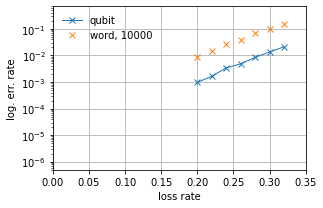

In [33]:
repeat = 100
Nl = 0

plt.figure(1,figsize=(4.6,3))

first = True
for i_rep in range(repeat):
    fname = "data_625q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)

    if os.path.exists(fname):
        npz_file = np.load(fname)
        succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

        if first :
            first = False
            succ_prob_X_avg = np.zeros((len(p_list),25))
            succ_prob_Z_avg = np.zeros((len(p_list),25))
            succ_prob_word_X_avg = np.zeros(len(p_list))
            succ_prob_word_Z_avg = np.zeros(len(p_list))
            Ntot = 0

        succ_prob_X_avg += succ_prob_X*Nrep
        succ_prob_Z_avg += succ_prob_Z*Nrep
        succ_prob_word_X_avg += succ_prob_word_X*Nrep
        succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
        Ntot += Nrep

if not first:
    succ_prob_X_avg /= Ntot
    succ_prob_Z_avg /= Ntot
    succ_prob_word_X_avg /= Ntot
    succ_prob_word_Z_avg /= Ntot
    # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
    # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
    succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
    succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg

    # plt.plot(p_list,1-succ_prob_avg,"-", linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
    plt.plot(p_list,1-np.mean(succ_prob_avg,axis=1),"x-", linewidth=1,label="qubit")
    plt.plot(p_list,1-succ_prob_word_avg,"x",label="word, %d" % (Ntot))        
    

# f = lambda x: x**5 + 5* x**4* (1-x) + 5*2*x**3 * (1-x)**2  ## 5 qubit code
# plt.plot(p_list,1-f(1-p_list),"-")

# x_list = np.linspace(0.6,1)
# plt.plot(x_list,x_list,"k--")
plt.xlabel("loss rate")
plt.ylabel("log. err. rate")
plt.yscale("log")
# plt.ylim(6e-1,1.01)
plt.ylim(5e-7,7e-1)
plt.xlim(0,0.35)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.grid()
plt.savefig("figs_Hassan/625q_single_layer.pdf")
plt.show()

## toric code

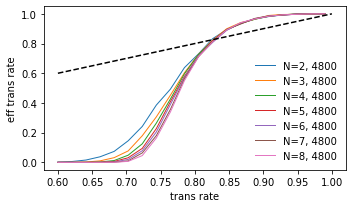

In [137]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,10)
L = 6 # dimension of tric code
plt.figure(1,figsize=(5,3))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_toric/" + "obc_L%d_Nl_%d_i_%d.npz" % (L,Nl,i_rep)
        else:
            fname = "data_toric/" + "Nl_L%d_%d_i_%d.npz" % (L,Nl,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_avg /= Ntot
        plt.plot(1-p_list,succ_prob_avg**2,"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))

f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")

x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()